<a href="https://colab.research.google.com/github/ArjunBhaybhang/Public-Projects/blob/main/Healthcare_Project_1_Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying Support Vector Machines using SVM with extensive Exploratory Data Analysis.
    


*In this project, we will predict whether a patient will have a heart stroke or not based on his/her comorbidities, work, and lifestyle*




Context

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.



# Imports

In [ ]:
%load_ext google.colab.data_table
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

# Load Data

In [ ]:
df_w = pd.read_csv('/content/drive/MyDrive/DATA Projects/Healthcare Projects/Healthcare Project 1 Stroke Prediction/healthcare-dataset-stroke-data.csv')
df = df_w.drop('id',axis=1)

# Data Cleaning

The dataset consists of 5110 instances with following features with target being stroke



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Lets observe the distribution of various features in the dataset

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.groupby('gender').mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,
Female,43.757395,0.092184,0.037742,104.057809,29.065758,0.047094
Male,42.483385,0.104965,0.077069,109.088520,28.647936,0.051064
Other,26.000000,0.000000,0.000000,143.330000,22.400000,0.000000


In [ ]:
# Replacing missing NA values in 'bmi' with their mean bmi of their gender
F_missing_bmi_index = df[(df.gender == 'Female') & (df.bmi.isna())].index
df.loc[F_missing_bmi_index, 'bmi'] = 29

M_missing_bmi_index = df[(df.gender == 'Male') & (df.bmi.isna())].index
df.loc[M_missing_bmi_index, 'bmi'] = 28

In [ ]:
# Removing the one instance where gender is 'Other' 
other_index = df[df['gender'] =='Other'].index
df = df.drop(other_index)

# Visualizing features

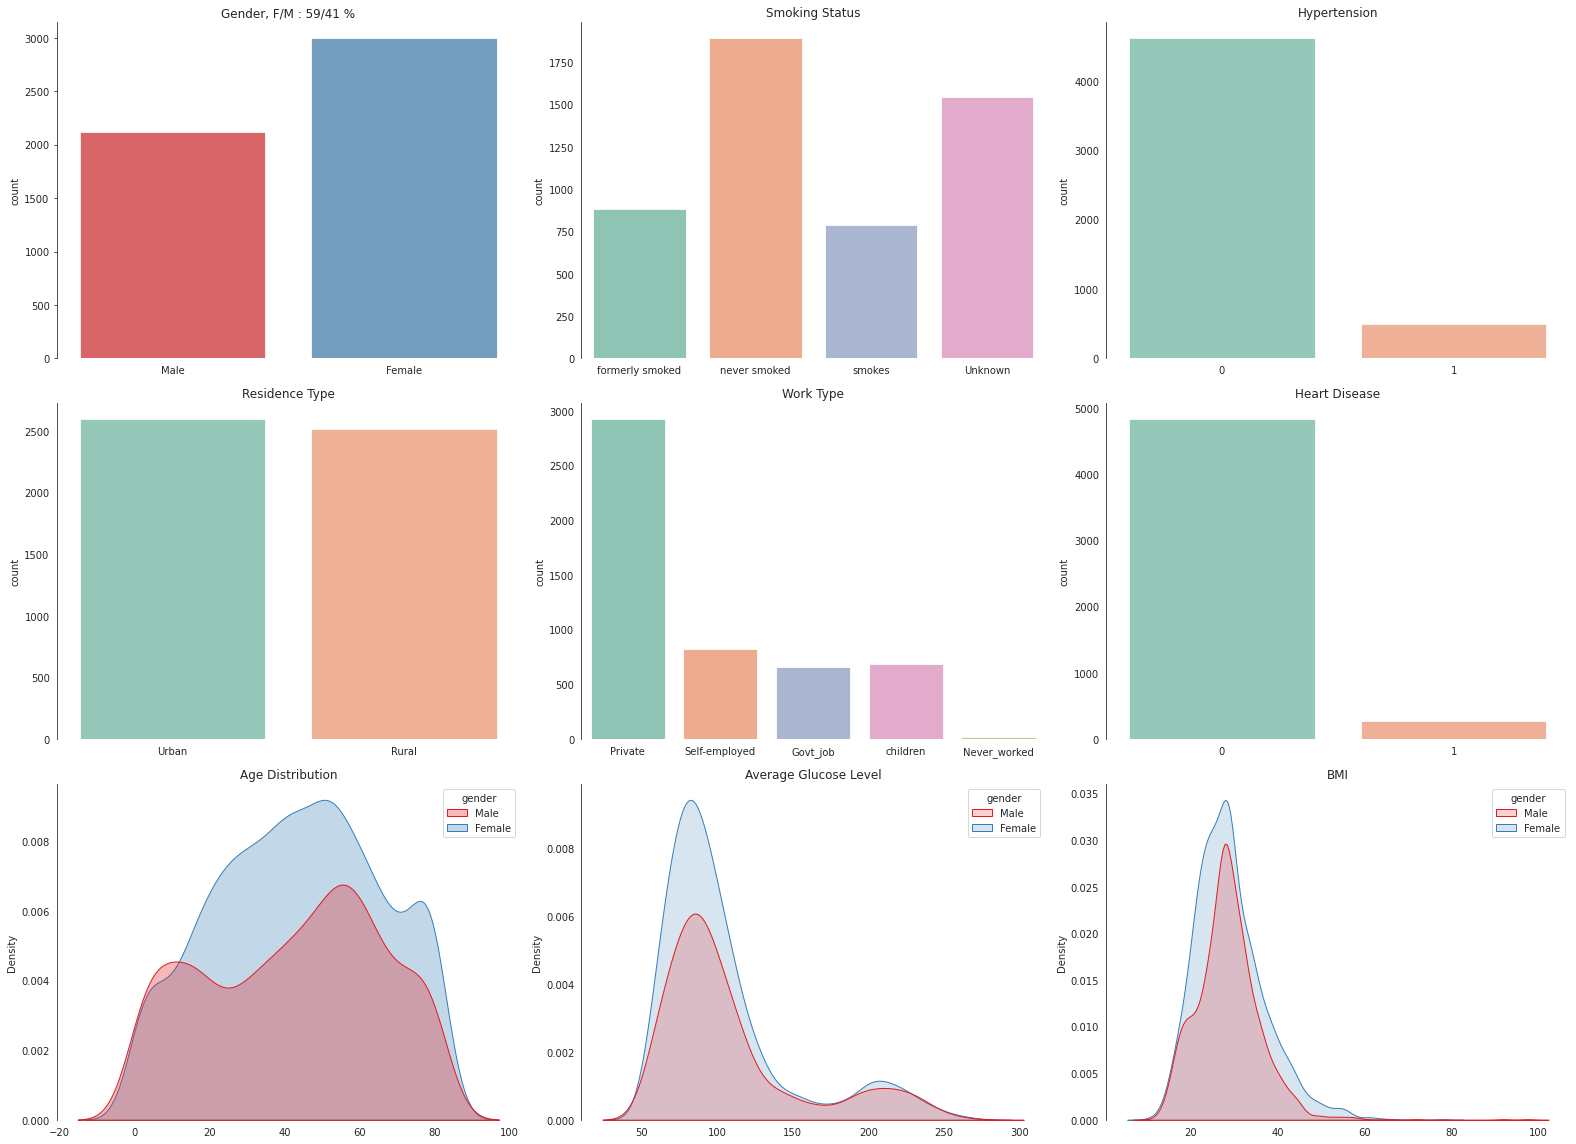

In [ ]:
plt.figure(figsize=(22,16))
plt.subplot(3,3,1)
sns.countplot(x=df['gender'], alpha=0.75, palette="Set1", label='');
plt.tick_params(axis='both', which='both', bottom=False, left=True, right=False, top=False, labelbottom=True, labelleft=True);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('')
plt.title('Gender, F/M : 59/41 %');


plt.subplot(3,3,2)
sns.countplot(x=df['smoking_status'], alpha=0.8, palette="Set2", label='Smoker', );
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Smoking Status');


plt.subplot(3,3,3)
sns.countplot(x=df['hypertension'], alpha=0.75, palette="Set2", label='hypertension', );
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Hypertension');

plt.subplot(3,3,4)
sns.countplot(x=df['Residence_type'], alpha=0.75, palette="Set2", label='Residence Type', );
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Residence Type');

plt.subplot(3,3,5)
sns.countplot(x=df['work_type'], alpha=0.8, palette="Set2", label='Work Type');
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Work Type');

plt.subplot(3,3,6)
sns.countplot(x=df['heart_disease'], alpha=0.75, palette="Set2", label='Heart Disease');
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Heart Disease');

plt.subplot(3,3,7)
sns.kdeplot(x=df['age'], alpha=0.3, palette="Set1", label='Smoker', fill=True, hue=df['gender']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Age Distribution');

plt.subplot(3,3,8)
sns.kdeplot(x=df['avg_glucose_level'], alpha=0.2, palette="Set1", label='avg_glucose_level', fill=True, hue=df['gender']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Average Glucose Level');

plt.subplot(3,3,9)
sns.kdeplot(x=df['bmi'], alpha=0.2, palette="Set1", label='BMI', fill=True, hue=df['gender']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('BMI');

plt.tight_layout()

In [ ]:
# checking imbalances in class {1: stroke, 0:no stroke}
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

# Preprocessing Data

In [ ]:
# Encoding categorical values

df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)
df['ever_married'] = df['ever_married'].replace({'Yes':1, 'No':0}).astype(np.uint8)
df['smoking_status'] = df['smoking_status'].replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1}).astype(np.uint8)

In [ ]:
X = df.drop('stroke', axis=1)
y = df.pop('stroke')

# SVM Model

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [ ]:
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(C=0.01,gamma=0.1, random_state=42, probability=True))])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y)

In [ ]:
# Our data is biased, we can fix this with SMOTE
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

In [ ]:
svm_cv = cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
svm_cv.mean()

0.8167291953412967

# Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix

svm_pipeline.fit(X_train_resh,y_train_resh);
svm_pred  = svm_pipeline.predict(X_test)
svm_cm = confusion_matrix(y_test,svm_pred)
svm_cm

array([[843, 370],
       [ 14,  51]])

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


Auc :  0.8176675756230579


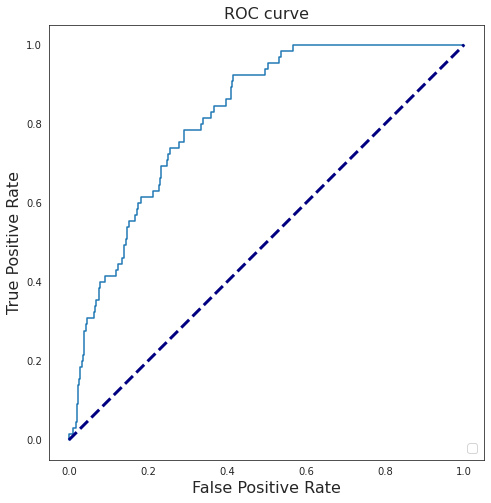

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_lr, tpr_lr, _ = roc_curve(y_test, svm_pipeline.predict_proba(X_test)[:,1])

plt.figure(figsize=(12,8));

plt.plot(fpr_lr, tpr_lr);
plt.xlabel('False Positive Rate', fontsize=16);
plt.ylabel('True Positive Rate', fontsize=16);
plt.title('ROC curve', fontsize=16);
plt.legend(loc='lower right', fontsize=13);
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--');
plt.axes().set_aspect('equal');

print('Auc : ', auc(fpr_lr, tpr_lr))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81      1213
           1       0.12      0.78      0.21        65

    accuracy                           0.70      1278
   macro avg       0.55      0.74      0.51      1278
weighted avg       0.94      0.70      0.78      1278

